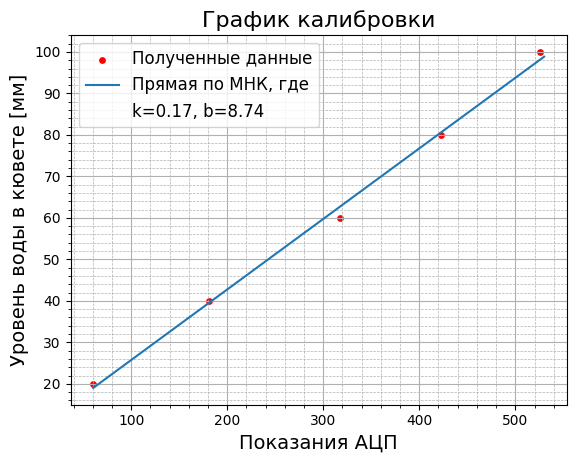

In [167]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

names=["./izmer_20.txt","./izmer_40.txt","./izmer_60.txt","./izmer_80.txt","./izmer_100.txt"]
calib=np.zeros((5,2))
for i in range (5):
    calib[i,0]=20+20*i
    data=(pd.read_csv(names[i],header=None, skiprows=1,nrows=100)).to_numpy()
    calib[i,1]=np.mean(data[:,1])

xy = np.mean(calib[:, 0] * calib[:, 1])
x2 = np.mean(calib[:, 1] ** 2)
y2 = np.mean(calib[:, 0] ** 2)
x = np.mean(calib[:, 1])
y = np.mean(calib[:, 0])
k=(xy-x*y)/(x2-x**2)
b=(y-k*x)

x=np.array([np.min(calib[:,1]),np.max(data[:,1])])
plt.scatter(calib[:,1],calib[:,0],marker='.',label="Полученные данные",c='red',s=60)
plt.plot(x,k*x+b, label="Прямая по МНК, где")
plt.scatter(100,20,alpha=0,label=f'k={k:.2f}, b={b:.2f}')
plt.xlabel('Показания АЦП',fontsize=14)
plt.ylabel('Уровень воды в кювете [мм]',fontsize=14)
plt.title('График калибровки', fontsize=16)
plt.legend(fontsize=12)
plt.minorticks_on()
plt.tick_params(axis='both', labelsize=10)
plt.grid(True, which='minor',lw=0.5,linestyle='--')
plt.grid(True, which='major')
plt.savefig('./Калибровка высоты',dpi=200,bbox_inches='tight',facecolor='white',edgecolor='none',transparent=False)
plt.show()

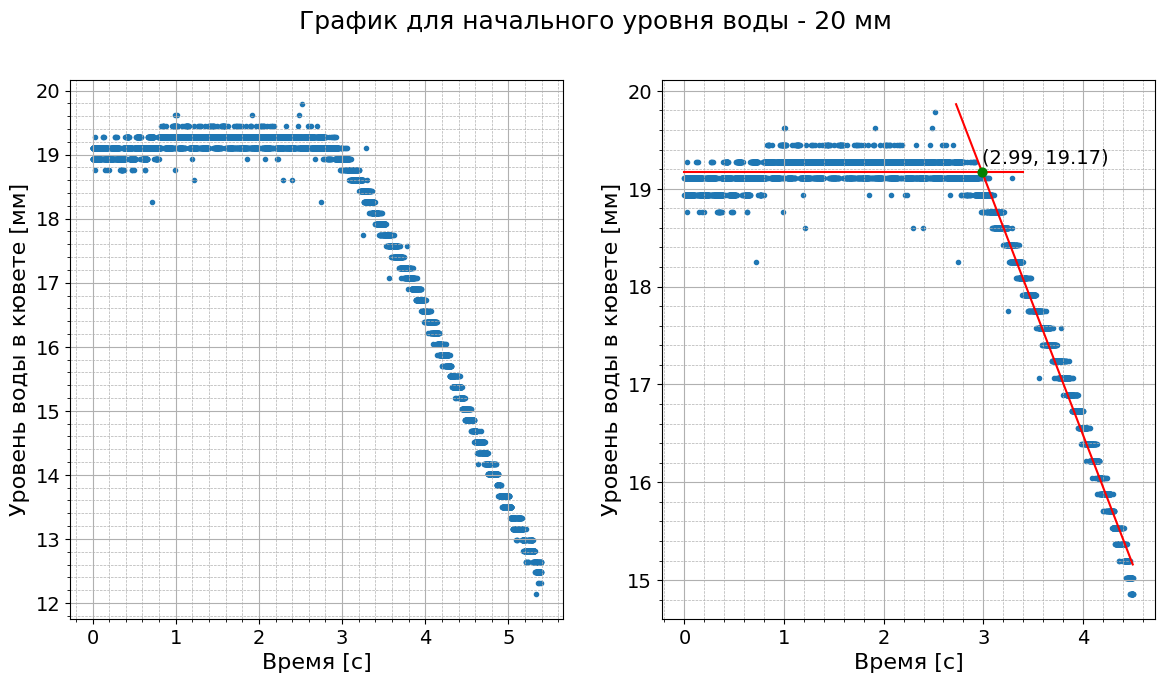

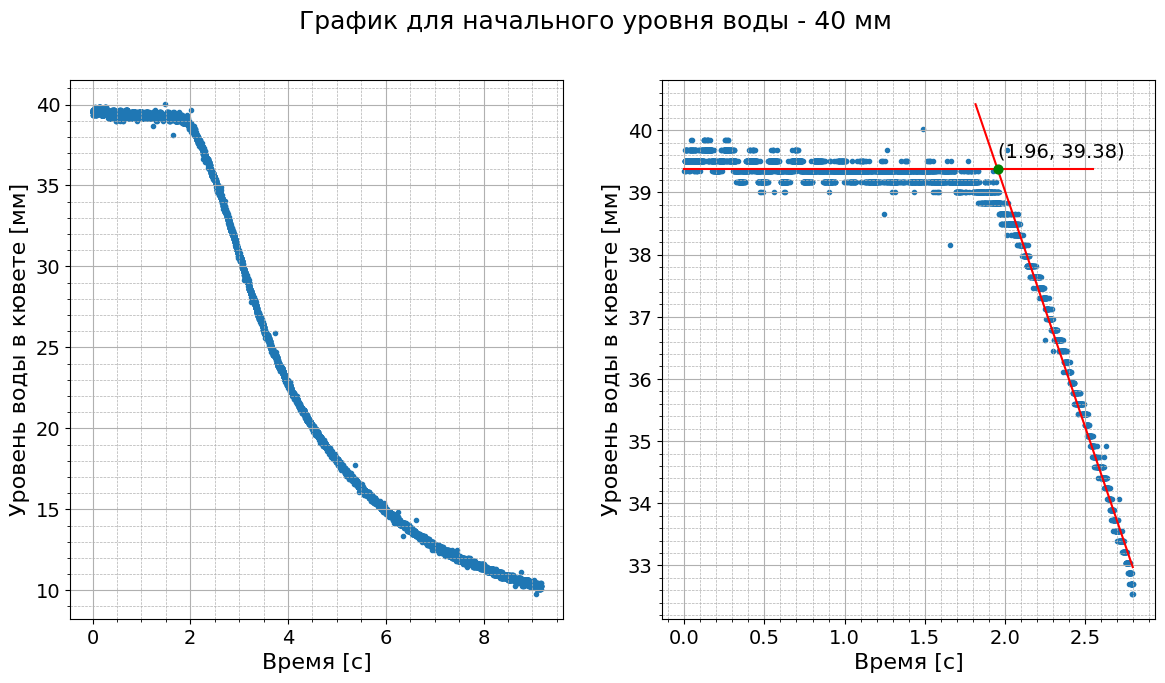

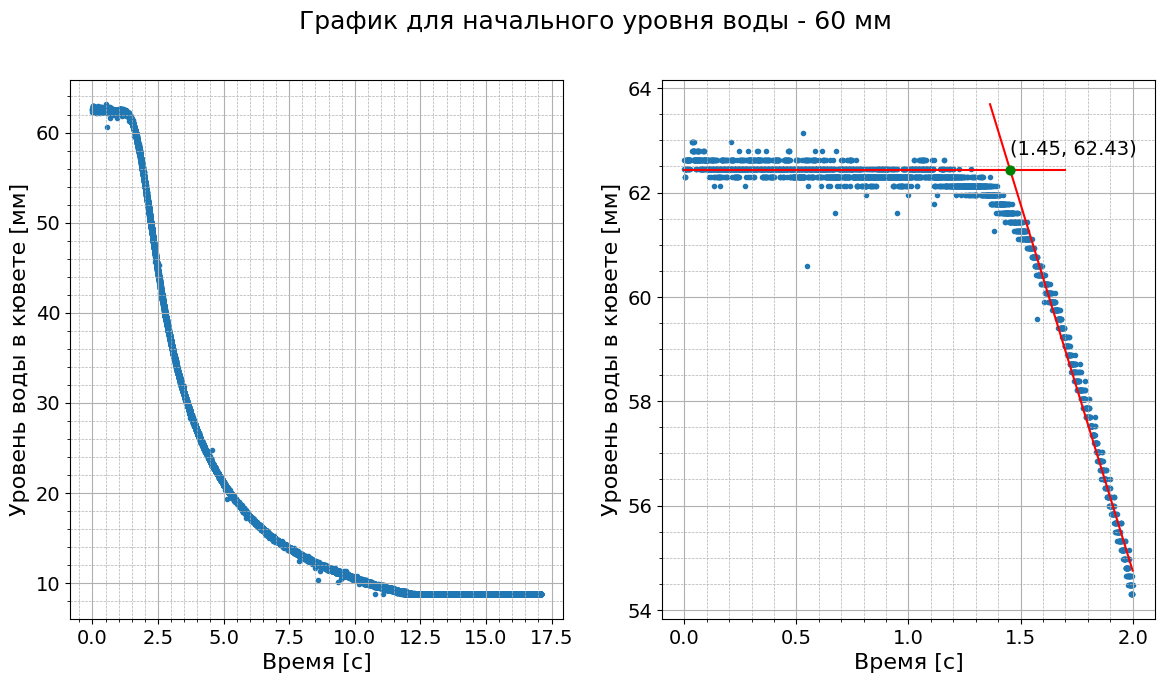

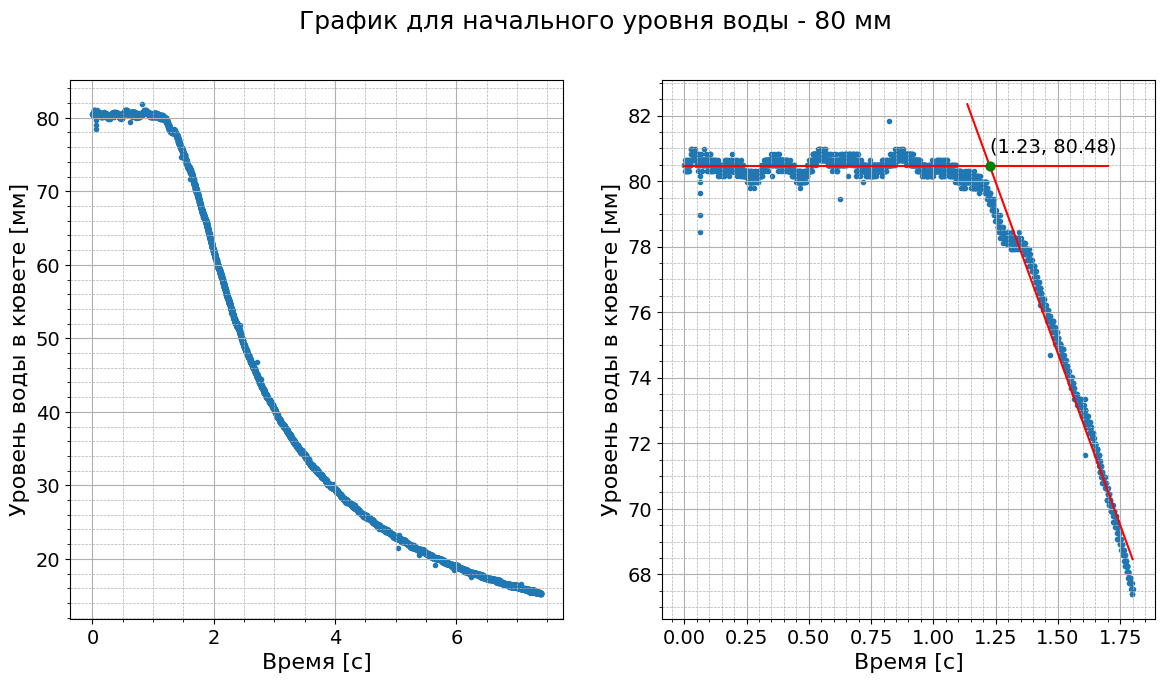

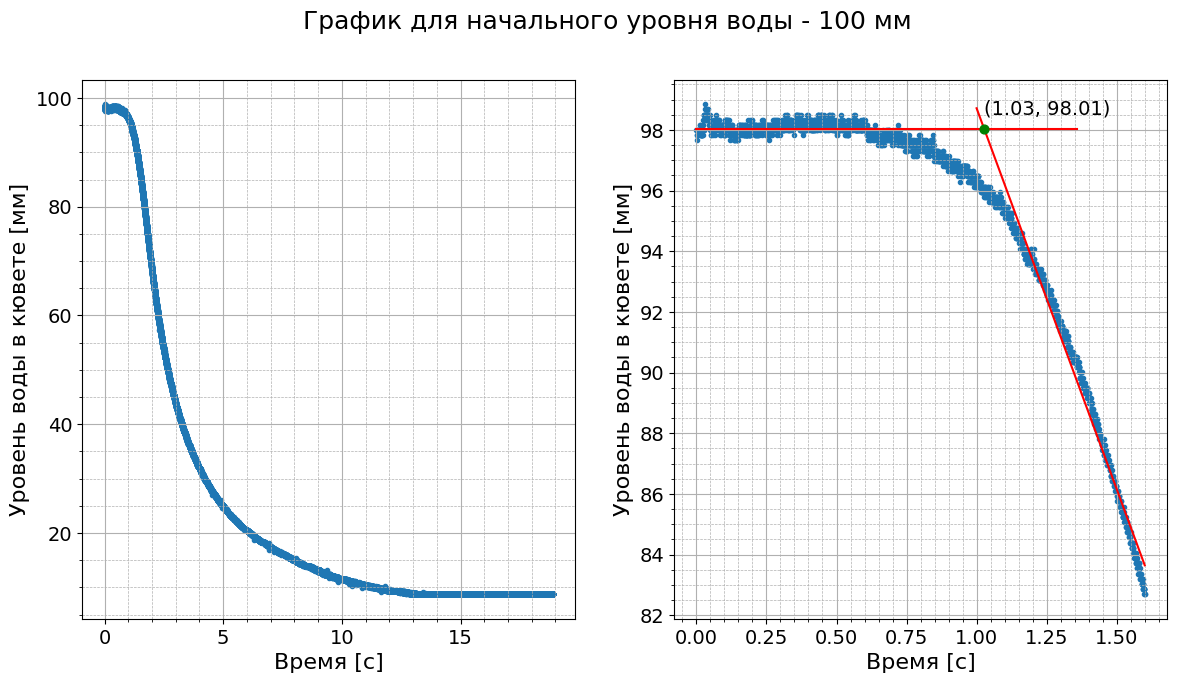

In [215]:
num=[4.5,2.8,2,1.8,1.6]
num2=[3,2,1.5,1.25,1.1]
num3=[2,1.5,1,1,0.8]
time_peres=[]
for j in range (5):
    fig, ax=plt.subplots(figsize=(14,7),nrows=1,ncols=2)
    ax=ax.flatten()
    
    data=(pd.read_csv(names[j],header=None,skiprows=1)).to_numpy()
    for i in range(1,len(data)):
        data[i,0]=data[i,0]-data[0,0]
    data[0,0]=0
    data[:,1]=data[:,1]*k+b
    ax[0].scatter(data[:,0], data[:,1], marker='.')
    ax[0].set_xlabel('Время [c]',fontsize=16)
    ax[0].set_ylabel('Уровень воды в кювете [мм]',fontsize=16)
    ax[0].minorticks_on()
    ax[0].grid(True, which='minor', lw=0.5, linestyle='--')
    ax[0].grid(True, which='major')
    ax[0].tick_params(axis='both', labelsize=14)

    start=0
    stop=0
    stop2=0
    for i in range (len(data)):
        if (data[i,0]<=num2[j]):
            start=i
        if (data[i,0]<=num3[j]):
            stop2=i
        if (data[i,0]>=num[j]):
            stop=i
            break

    xy=np.mean(data[start:stop,0]*data[start:stop,1])
    x2=np.mean(data[start:stop,0]**2)
    y2=np.mean(data[start:stop,1]**2)
    x=np.mean(data[start:stop,0])
    y=np.mean(data[start:stop,1])

    k1=(xy-x*y)/(x2-x**2)
    b1=(y-k1*x)
    err_k1=1/(len(data[start:stop,0]))*( (y2-y**2)/(x2-x**2)-k1**2 )**0.5
    err_b1=err_k1*(x2-x**2)**0.5
    xx=np.array([np.min(data[start:stop,0])/1.1,np.max(data[start:stop,0])])
    
    yyy=[np.mean(data[:stop2,1]),np.mean(data[:stop2,1])]
    xxx=[0,data[stop2,0]*1.7]
    peresec=(((np.mean(data[:stop2,1])-b1)/k1))
    pery=np.mean(data[:stop2,1])
    time_peres.append(peresec)
    
    ax[1].scatter(peresec,np.mean(data[:stop2,1]),c="green",s=40,zorder=10)
    ax[1].text(peresec,np.mean(data[:stop2,1]*1.005),f'({peresec:.2f}, {pery:.2f})',fontsize=14)
    ax[1].plot(xxx,yyy,c='red')
    ax[1].plot(xx,k1*xx+b1,c='red')
    ax[1].scatter(data[:stop,0], data[:stop,1], marker='.')
    ax[1].set_xlabel('Время [c]',fontsize=16)
    ax[1].set_ylabel('Уровень воды в кювете [мм]',fontsize=16)
    ax[1].minorticks_on()
    ax[1].grid(True, which='minor', lw=0.5, linestyle='--')
    ax[1].grid(True, which='major')
    ax[1].tick_params(axis='both', labelsize=14)
    plt.suptitle(f'График для начального уровня воды - {20+20*j} мм', fontsize=18)
    plt.savefig(f'./График для {20+20*j} мм',dpi=200,bbox_inches='tight',facecolor='white',edgecolor='none',transparent=False)
    plt.show()

0.6609809837313663 3.2632554767220956


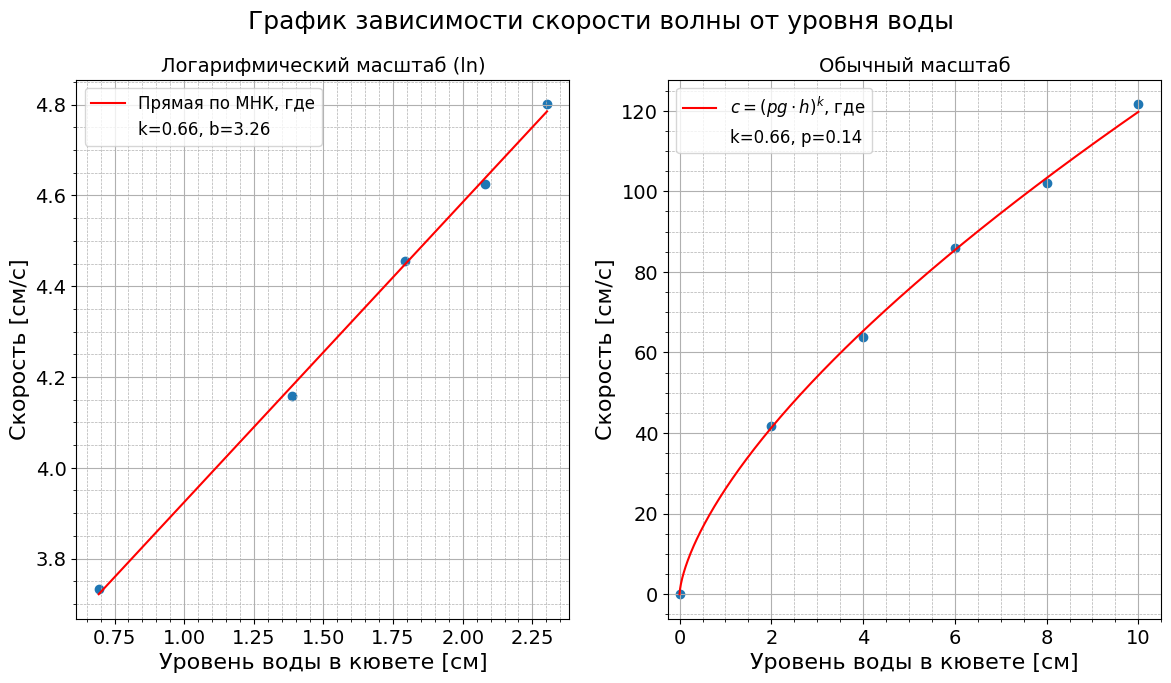

In [216]:
time_peres=np.array(time_peres,dtype='float')
last1=np.zeros((6,2))
last=np.zeros((5,2))
l=125
for i in range (5):
    last[i,0]=(20+20*i)/10
    last[i,1]=l/time_peres[i]
    last1[i,0]=(20+20*i)/10
    last1[i,1]=l/time_peres[i]
last1[5,0]=0
last1[5,1]=0
fig, ax=plt.subplots(figsize=(14,7),nrows=1,ncols=2)
ax=ax.flatten()

last[:,0]=np.log(last[:,0])
last[:,1]=np.log(last[:,1])

xy = np.mean(last[:, 0] * last[:, 1])
x2 = np.mean(last[:, 0] ** 2)
y2 = np.mean(last[:, 1] ** 2)
x = np.mean(last[:, 0])
y = np.mean(last[:, 1])

k2=(xy-x*y)/(x2-x**2)
b2=(y-k2*x)
x=np.array([np.min(last[:,0]),np.max(last[:,0])])
print((k2), (b2))
ax[0].scatter((last[:,0]),(last[:,1]))
ax[0].plot(x,k2*x+b2,c='red',label="Прямая по МНК, где")
ax[0].scatter(1,4,alpha=0,label=f'k={k2:.2f}, b={b2:.2f}')
ax[0].set_title("Логарифмический масштаб (ln)", fontsize=14)
ax[0].legend(fontsize=12)

t=np.e**(b2/k2)/981
x=np.linspace(0,10,1000)
ax[1].scatter((last1[:,0]),(last1[:,1]))
ax[1].plot(x,(t*981*x)**k2, c='red',label=r'$c = (p g \cdot h)^k$, где')
ax[1].scatter(1,1,alpha=0,label=f'k=0.66, p={t:.2f}')
ax[1].set_xlim(left=-0.25)
ax[1].set_title("Обычный масштаб", fontsize=14)
ax[1].legend(fontsize=12)

for i in range (2):
    ax[i].set_ylabel('Скорость [cм/с]',fontsize=16)
    ax[i].set_xlabel('Уровень воды в кювете [см]',fontsize=16)
    ax[i].minorticks_on()
    ax[i].grid(True, which='minor', lw=0.5, linestyle='--')
    ax[i].grid(True, which='major')
    ax[i].tick_params(axis='both', labelsize=14)
    plt.suptitle(f'График зависимости скорости волны от уровня воды', fontsize=18)
plt.savefig('./График скорости от уровня',dpi=200,bbox_inches='tight',facecolor='white',edgecolor='none',transparent=False)
plt.show()